In [1]:
# Importing required libraries.
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,f1_score ,classification_report ,confusion_matrix ,precision_recall_curve ,roc_curve ,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
print('All imports done.')

All imports done.


In [2]:
# Reading the dataset into pandas dataframe
data = pd.read_csv("C:/Users/HP/Downloads/ML/DataSets/creditcardfraud_ds.csv") 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Get the info related to data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Time in this case is an unnecessary factor
data.drop(['Time'] , axis= 1 , inplace= True)
print(data.shape)

(284807, 30)


In [5]:
# removing the duplicates from the data
data.drop_duplicates(keep= 'first' , inplace= True)
print(data.shape)

(275663, 30)


In [6]:
# checking whether there are any empty cells in data
data.isnull().values.any() 

False

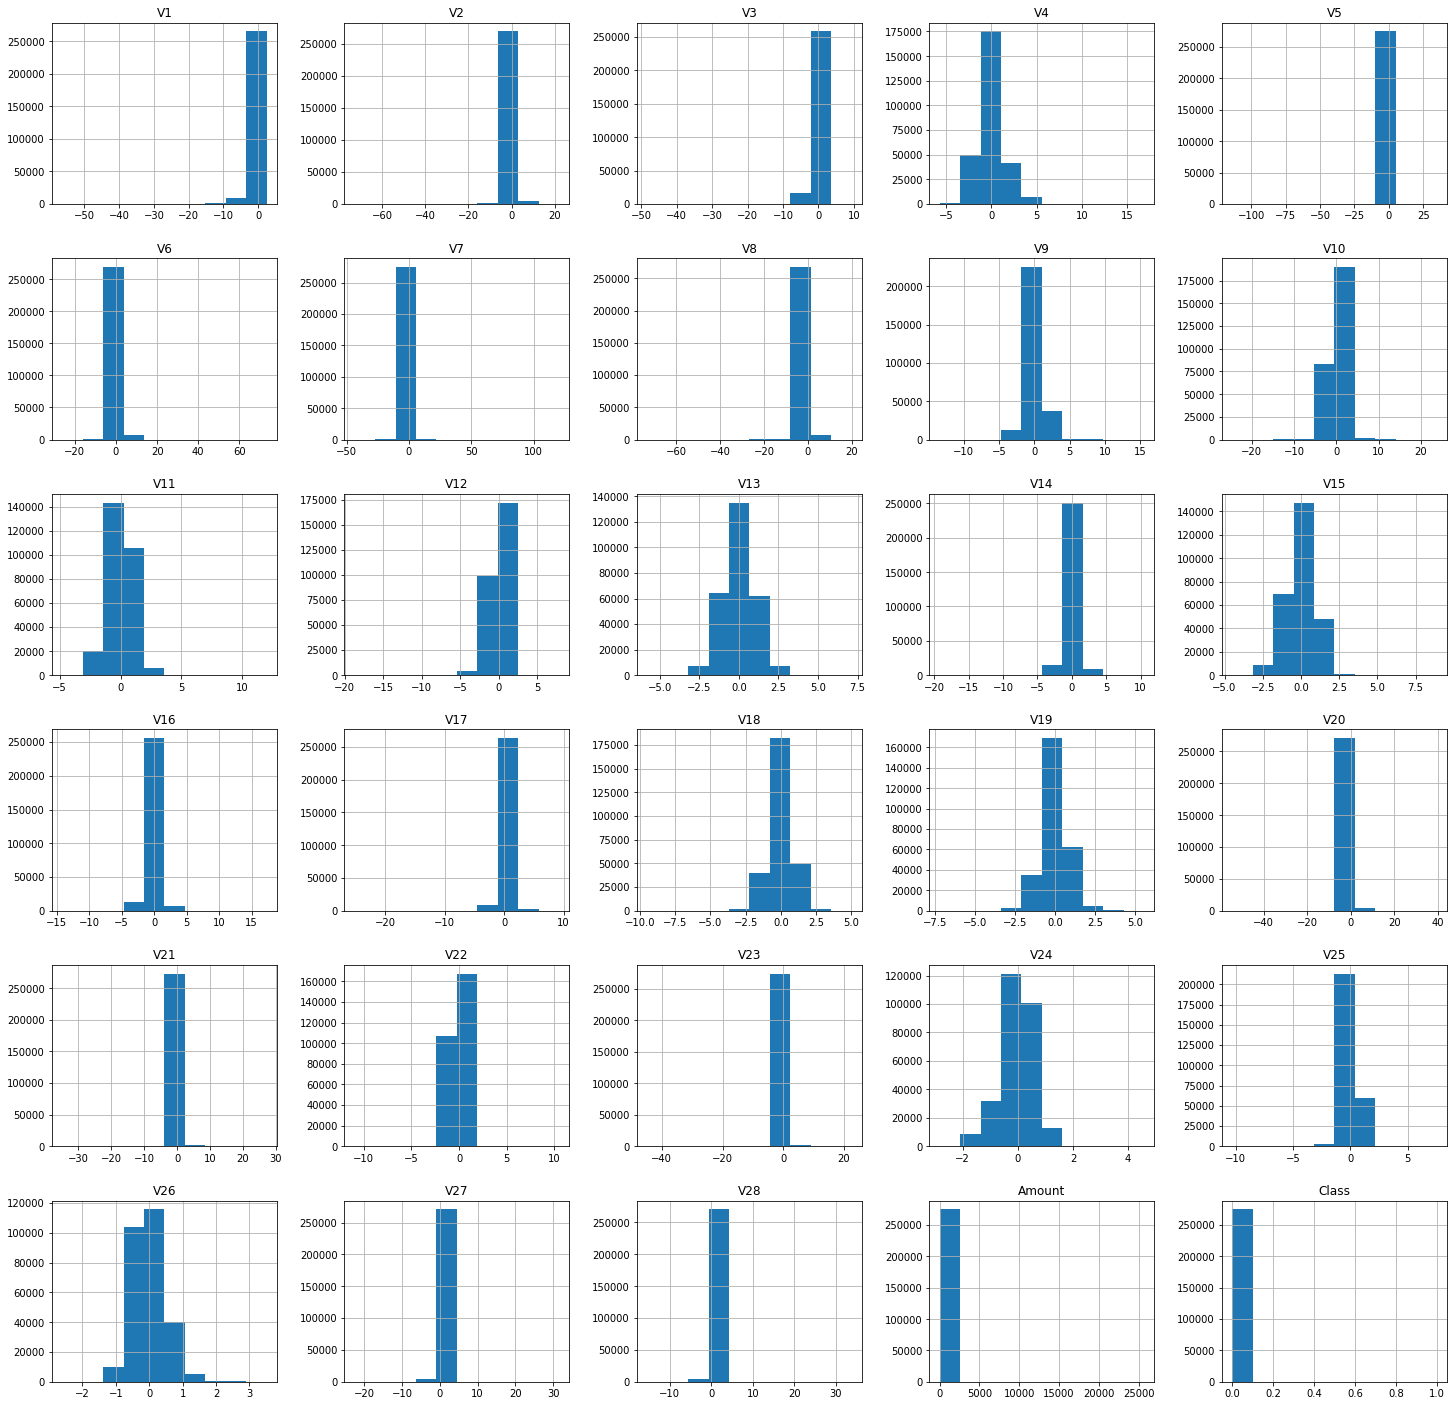

In [7]:
# plots the histograms of the each feature.
data.hist(figsize= (25,25))
plt.show()

<AxesSubplot:>

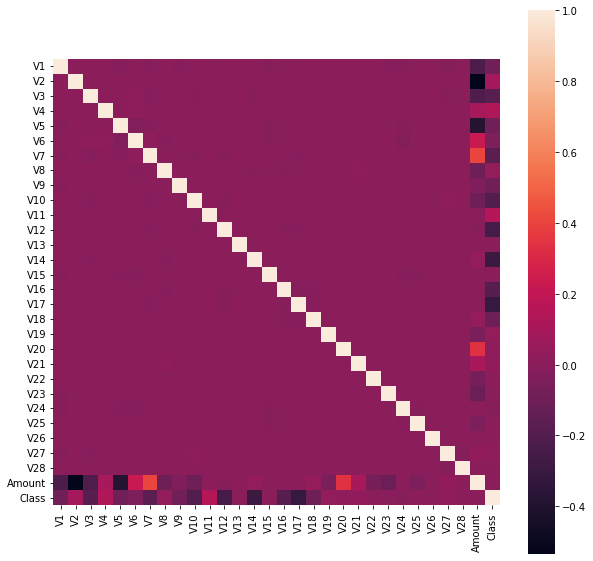

In [8]:
# Correlation Matrix
fig = plt.figure(figsize=(10,10))
sns.heatmap(data.corr() , square= True )

Text(0, 0.5, 'Frequency (Number of transactions)')

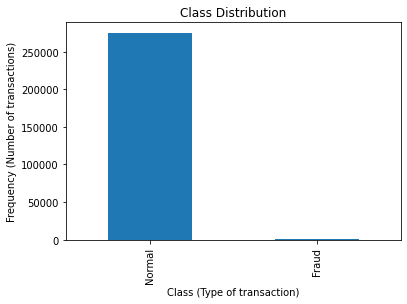

In [9]:
# plotting a bar graph showing normal transactions and fraud transactions.
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar')
plt.xticks(range(2),['Normal','Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class (Type of transaction)') 
plt.ylabel('Frequency (Number of transactions)')

From the above bar graph , We can conclude that dataset is highly imbalanced.

In [10]:
# Finding the number of normal transactions and fraud transactions in the dataset.
normal = data[data['Class'] == 0] 
fraud = data[data['Class'] == 1]

print('Number of normal transactions are :' , normal.shape[0])
print('Number of fraud transactions are :' , fraud.shape[0])
print('Total number of transactions are :' , data.shape[0])

Number of normal transactions are : 275190
Number of fraud transactions are : 473
Total number of transactions are : 275663


In [11]:
# Splitting the dataset into X (input) and Y(output) . 
# Input containing data of all columns except column Class.
# Output contains data from column Class , which predicts transaction is fraud or not.
col = data.columns.tolist()
col.remove('Class')

X = data[col]
Y = data['Class']

[X.shape,Y.shape]

[(275663, 29), (275663,)]

In [12]:
# Spitting the given data into 80:20 making training set and test set.
# random_state is set so that we can control shuffing and output can be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 4) 
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(220530, 29), (220530,)], [(55133, 29), (55133,)]]

In [13]:
# Finding outlier fraction of the training set to improve training accuracy. 
train_normal , train_fraud = Y_train.value_counts()
Y_train.value_counts()
outlier_fraction = train_fraud / train_normal 
outlier_fraction 

0.001753397776001163

In [14]:
# converting the pandas dataframe into a numpy array
X_train = X_train.values 
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values 

##### Next step is to train the model using train set and test it with the test set. Now , I will process the data with several anomaly detection models. The models will be judged based on the following properties :
1. Accuracy  = Number of correct predictions / Total number of predictions.    
As our data set is highly imbalanced , accuracy cannot be a perfect measure to measure the performance of the model.  

2. Precision = Number of correct predictions in a class(Normal/Fraud) / Number of predicted labels in that class.  
That implies , Precision = True Positives / (True Positives + False Positives)   

3. Recall    = Number of correct predictions in a class(Normal/Fraud) / Number of actual labels in that class.   
That implies , Recall = True Positives / (True Positives + False Negatives)     
    
   Now , we develop a Precision-Recall trade off. So we use the F1 score , which strikes a balance between Precision and Recall.   

4. F1 Score  = Harmonic mean of precision and recall.   
That implies , F1 Score = True Positives / (True Positives + 1/2(False postives + False Negatives))  

   And we have two averaging techniques , macro avg(unweighted average) and weighted avg . We prefer macro avg as our dataset is imbalanced.

In [15]:
def confusion_matrix_plot(Y,y):
    plt.figure(figsize=(6,6))
    data = confusion_matrix(Y,y) 
    l = ['Normal','Fraud']
    sns.heatmap(data,annot= True,annot_kws= {'size':18},fmt= 'd',linewidths= .5,cmap= 'PiYG',square= True,xticklabels= l ,yticklabels= l)
    plt.ylabel('Actual transaction')
    plt.xlabel('Predicted transaction')

In [16]:
def pr_curve(Y,y_):
    precision , recall , _ = precision_recall_curve(Y,y_)
    _ , ax = plt.subplots()
    ax.plot(recall , precision)

    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
    plt.show()

In [17]:
def ROC_curve(Y,y_):
    fpr , tpr , _ = roc_curve(Y,y_)
    _ , ax = plt.subplots()
    ax.plot(fpr,tpr)

    ax.set_title('ROC Curve')
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    plt.show()

# Model 1 : Logistic Regression

In [18]:
LR = LogisticRegression(solver='liblinear' , max_iter= 1000 , random_state= 4)
LR.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=4, solver='liblinear')

In [19]:
def lr_predict(X,Y):
    y = LR.predict(X)
    y_ = LR.predict_proba(X)[:,1]

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_)

    print(classification_report(Y,y))

    ROC_curve(Y,y_)

    print('Area Under ROC Curve is ' , roc_auc_score(Y,y_))

Accuracy Score : 0.999147508275518
F1 Score : 0.8564938766866166


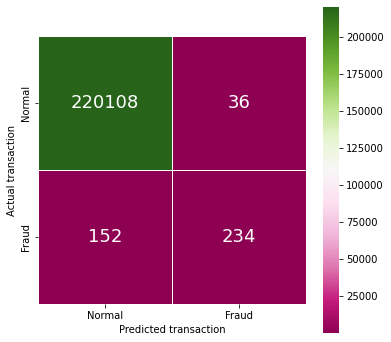

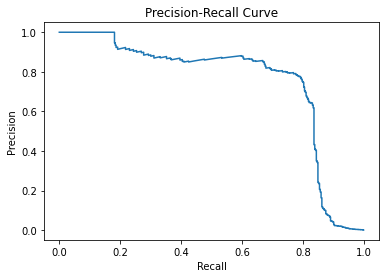

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       0.87      0.61      0.71       386

    accuracy                           1.00    220530
   macro avg       0.93      0.80      0.86    220530
weighted avg       1.00      1.00      1.00    220530



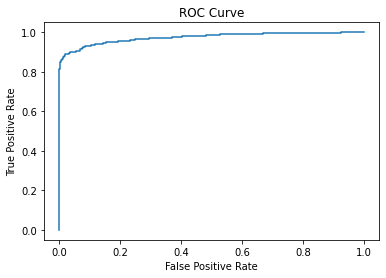

Area Under ROC Curve is  0.9735212175770394


In [20]:
lr_predict(X_train , Y_train)  

Accuracy Score : 0.9991112400921408
F1 Score : 0.820945416831343


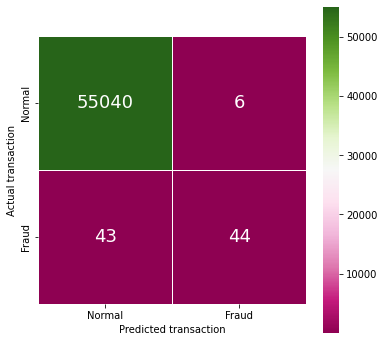

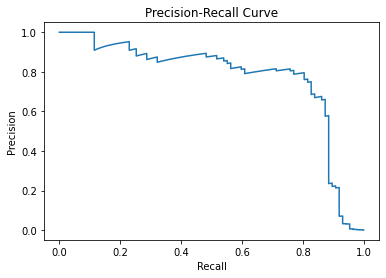

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.88      0.51      0.64        87

    accuracy                           1.00     55133
   macro avg       0.94      0.75      0.82     55133
weighted avg       1.00      1.00      1.00     55133



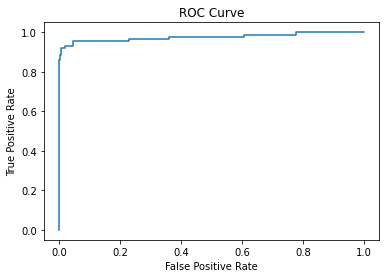

Area Under ROC Curve is  0.9758106177445739


In [21]:
lr_predict(X_test , Y_test)

# Model 2 : Random Forest

In [22]:
rfc = RandomForestClassifier( max_depth= 5 ,criterion = 'entropy' , max_samples= len(X_train) ,  random_state= 4) 
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_samples=220530,
                       random_state=4)

In [23]:
def rfc_predict(X,Y):
    y = rfc.predict(X)  
    y_ = rfc.predict_proba(X)[:,1]
    
    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_)

    print(classification_report(Y,y))

    ROC_curve(Y,y_)

    print('Area Under ROC Curve is ' , roc_auc_score(Y,y_))

Accuracy Score : 0.999537477894164
F1 Score : 0.9274410027960849


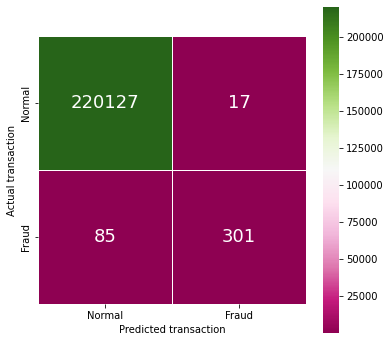

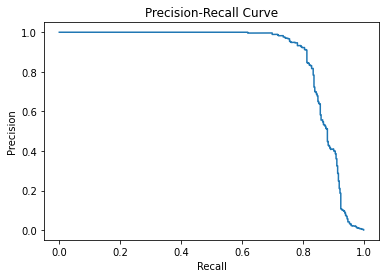

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       0.95      0.78      0.86       386

    accuracy                           1.00    220530
   macro avg       0.97      0.89      0.93    220530
weighted avg       1.00      1.00      1.00    220530



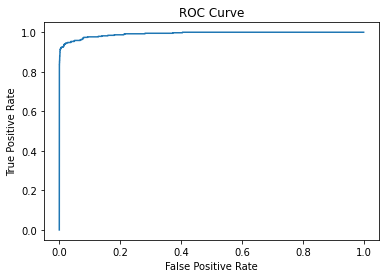

Area Under ROC Curve is  0.992102931590326


In [24]:
rfc_predict(X_train , Y_train)

Accuracy Score : 0.999492137195509
F1 Score : 0.9101292646747192


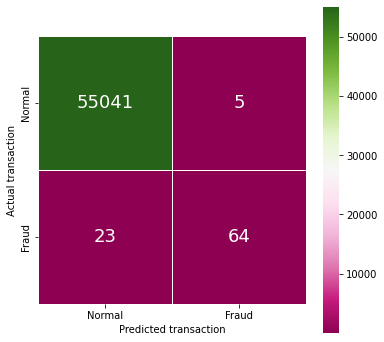

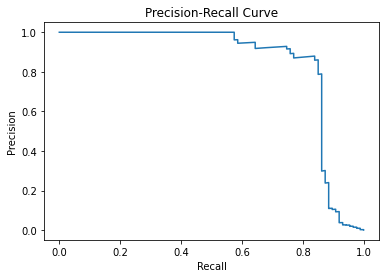

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.93      0.74      0.82        87

    accuracy                           1.00     55133
   macro avg       0.96      0.87      0.91     55133
weighted avg       1.00      1.00      1.00     55133



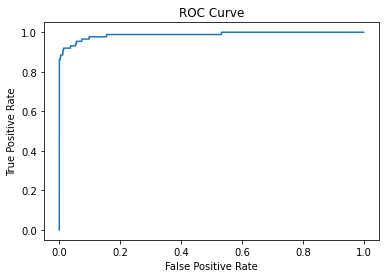

Area Under ROC Curve is  0.9878797294300566


In [25]:
rfc_predict(X_test , Y_test)

# Model 3 : Decision Trees

In [26]:
dt = DecisionTreeClassifier(max_depth= 5 , criterion= 'entropy' , random_state= 4)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=4)

In [27]:
def dt_predict(X,Y):
    y = dt.predict(X)
    y_ = dt.predict_proba(X)

    print("Accuracy Score :" , accuracy_score(Y,y))

    print("F1 Score :" , f1_score(Y,y,average='macro'))

    confusion_matrix_plot(Y,y)

    pr_curve(Y,y_[:,1])

    print(classification_report(Y,y))

    ROC_curve(Y,y_[:,1])

    print('Area Under ROC Curve is ' , roc_auc_score(Y,y_[:,1]))

Accuracy Score : 0.9995193397723666
F1 Score : 0.9254414384006604


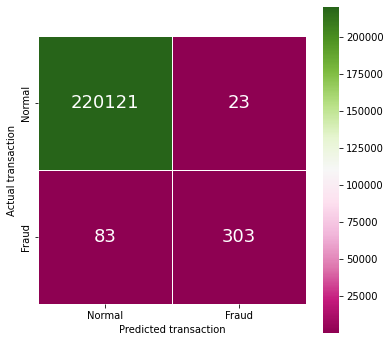

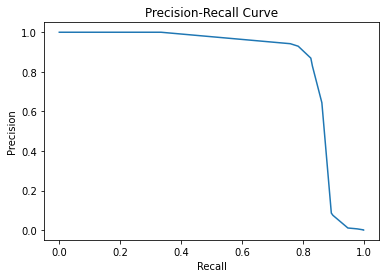

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220144
           1       0.93      0.78      0.85       386

    accuracy                           1.00    220530
   macro avg       0.96      0.89      0.93    220530
weighted avg       1.00      1.00      1.00    220530



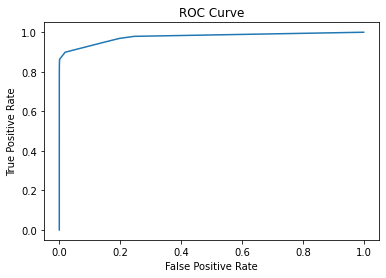

Area Under ROC Curve is  0.9768253137277645


In [28]:
dt_predict(X_train , Y_train) 

Accuracy Score : 0.9994558612809026
F1 Score : 0.9024611776627907


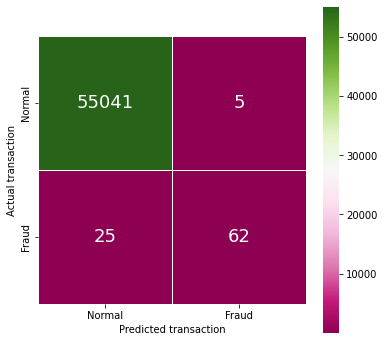

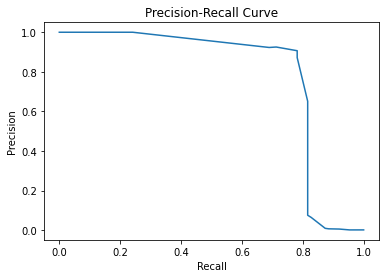

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55046
           1       0.93      0.71      0.81        87

    accuracy                           1.00     55133
   macro avg       0.96      0.86      0.90     55133
weighted avg       1.00      1.00      1.00     55133



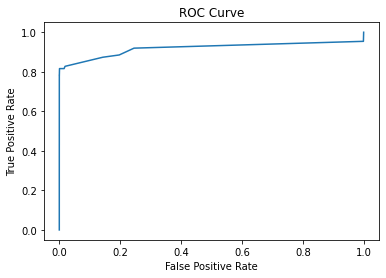

Area Under ROC Curve is  0.9190332348994633


In [29]:
dt_predict(X_test , Y_test) 